In [1]:
%cd '/content/drive/MyDrive/Mask_RCNN/samples/balloon'

/content/drive/MyDrive/Mask_RCNN/samples/balloon


In [2]:
!pip install -r /content/drive/MyDrive/Mask_RCNN/requirements.txt

In [3]:
import os
import sys
import random
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/drive/MyDrive/Mask_RCNN")

# Import Mask RCNN
sys.path.append(ROOT_DIR) # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
import balloon


%matplotlib inline

# Directory to save logs and trained model
MODEL_DIR = os.path.join("/content/drive/MyDrive/mask_rcnn_balloon.h5")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join("/content/drive/MyDrive/mask_rcnn_balloon.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
  utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on/
##IMAGE_DIR = os.path.join(ROOT_DIR, "/content/drive/MyDrive/ridge_valley/dataset/train")##

#########################
class InferenceConfig(balloon.BalloonConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    LEARNING_RATE = 0.01

config = InferenceConfig()
config.display()

#############################

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

model.load_weights(COCO_MODEL_PATH, by_name=True)
#############


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.01
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

Using TensorFlow backend.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








In [4]:
from google.colab.patches import cv2_imshow

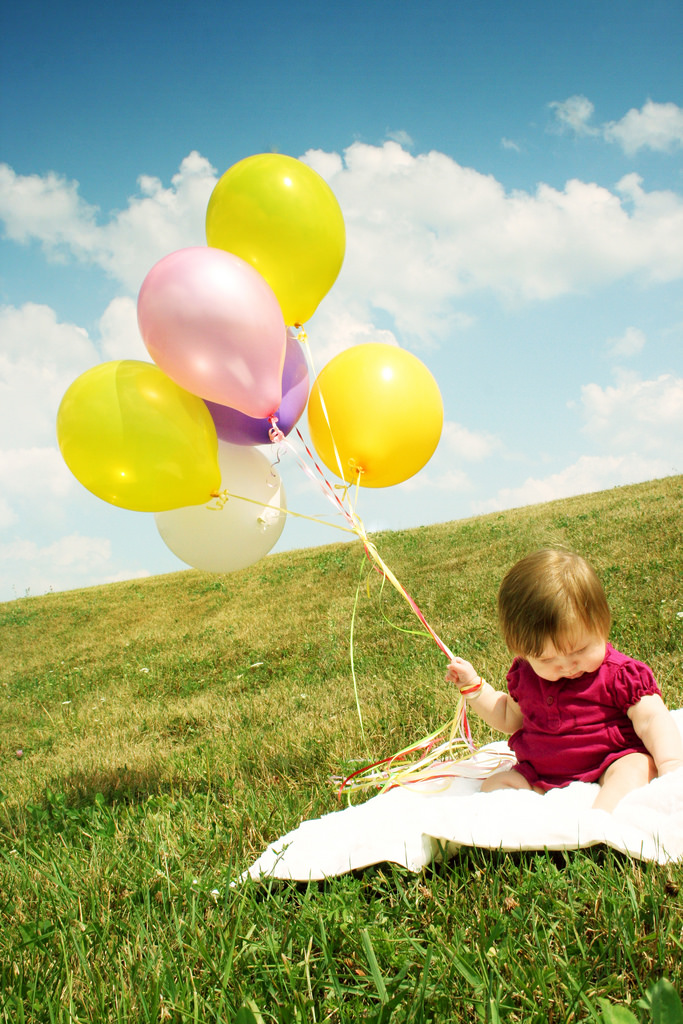

Processing 1 images
image                    shape: (1024, 683, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


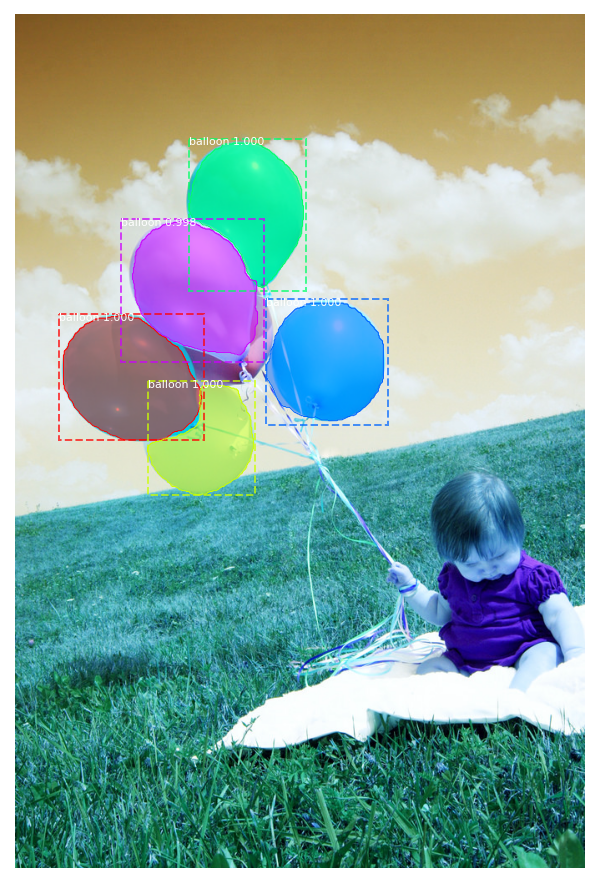

In [16]:
## function for testing.

# def show_mask(img_path):
image = cv2.imread('/content/drive/MyDrive/balloon/val/3825919971_93fb1ec581_b.jpg')  #/content/Roof/images/train/roof11.jpg

# original image
cv2_imshow(image)
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
class_names = ["BG", "balloon"]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [17]:
mask = r['masks']
mask = mask.astype(int)
# mask.shape

In [20]:
refined_image = cv2.imread('/content/drive/MyDrive/balloon/val/3825919971_93fb1ec581_b.jpg')
for i in range(mask.shape[2]):
    temp = cv2.imread('/content/drive/MyDrive/balloon/val/3825919971_93fb1ec581_b.jpg')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    refined_image = cv2.subtract(refined_image, temp)

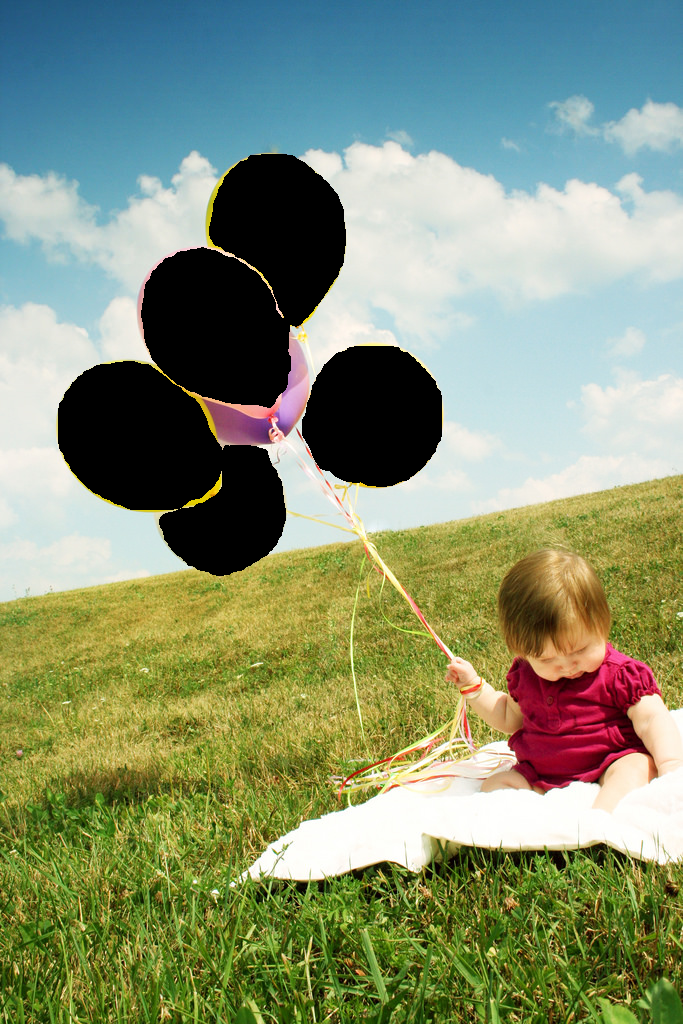

In [21]:
cv2_imshow(refined_image)